<a href="https://colab.research.google.com/github/nhut1205/Test/blob/main/Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ma trận ban đầu:
[[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [  0  -1  -1   0  -1 100]
 [ -1   0  -1  -1   0 100]]

Ma trận Q sau khi huấn luyện:
[[ 0  0  0  0 88  0]
 [ 0  0  0 78  0 99]
 [ 0  0  0 78  0  0]
 [ 0 88 69  0 88  0]
 [78  0  0 78  0 99]
 [ 0  0  0  0  0  0]]


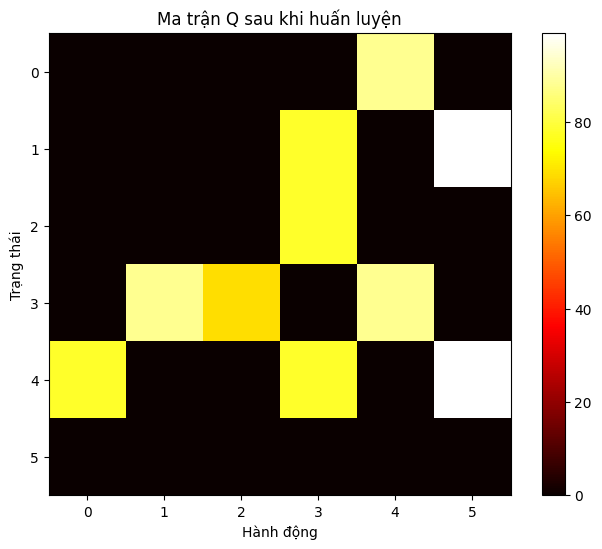

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

R = np.array([[-1, -1, -1, -1, 0, -1],
              [-1, -1, -1, 0, -1, 100],
              [-1, -1, -1, 0, -1, -1],
              [-1, 0, 0, -1, 0, -1],
              [0, -1, -1, 0, -1, 100],
              [-1, 0, -1, -1, 0, 100]])

Q = np.zeros_like(R)

num_episodes = 1000
learning_rate = 0.8
gamma = 0.9

# Hàm chọn hành động
def choose_action(state):
    possible_actions = np.where(R[state] >= 0)[0]
    return np.random.choice(possible_actions)

print("Ma trận ban đầu:")
print(R)

# Huấn luyện Q-learning
for _ in range(num_episodes):
    state = np.random.randint(0, 6)
    while state != 5:
        action = choose_action(state)
        next_state = action
        Q[state, action] = (1 - learning_rate) * Q[state, action] + learning_rate * (R[state, action] + gamma * np.max(Q[next_state]))
        state = next_state

print("\nMa trận Q sau khi huấn luyện:")
print(Q)

# Hiển thị ma trận Q dưới dạng biểu đồ
plt.figure(figsize=(8, 6))
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Ma trận Q sau khi huấn luyện')
plt.xlabel('Hành động')
plt.ylabel('Trạng thái')
plt.show()
